In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter, DayLocator
import datetime
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df_binance = pd.read_csv("../Data/binance_data.csv")
df_binance

,Unnamed: 0,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,2017-08-17 23:59:59.999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395
1,1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-18 23:59:59.999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409
2,2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-19 23:59:59.999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529
3,3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-20 23:59:59.999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084
4,4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-21 23:59:59.999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1538,2021-11-02,60911.12,64270.00,60624.68,63219.99,46368.284100,2021-11-02 23:59:59.999,2.909221e+09,1858362,23852.142820,1.496448e+09,0.000000
1539,1539,2021-11-03,63220.57,63500.00,60382.76,62896.48,43336.090490,2021-11-03 23:59:59.999,2.713390e+09,1601925,20662.347770,1.294306e+09,0.000000
1540,1540,2021-11-04,62896.49,63086.31,60677.01,61395.01,35930.933140,2021-11-04 23:59:59.999,2.218138e+09,1346081,17843.380350,1.101752e+09,0.000000
1541,1541,2021-11-05,61395.01,62595.72,60721.00,60937.12,31604.487490,2021-11-05 23:59:59.999,1.943346e+09,1243074,15769.154940,9.697806e+08,0.000000


# Some Transformation

In [3]:
#To int
df_binance["Open"] = pd.to_numeric(df_binance["Open"])
df_binance["Close"] = pd.to_numeric(df_binance["Close"])
df_binance["High"] = pd.to_numeric(df_binance["High"])
df_binance["Low"] = pd.to_numeric(df_binance["Low"])
df_binance["Open time"] = pd.to_datetime(df_binance["Open time"])

#Calculate the difference between opening and closing
df_binance["Open-Close"] = df_binance["Open"]-df_binance["Close"]
#Calculate the difference between daily highest and lowest values
df_binance["High-Low"] = df_binance["High"]-df_binance["Low"]
#Calculate the percentual between daily highest and lowest values
df_binance["Percentual Increase(High low)"] = df_binance["High-Low"]/df_binance["High"]*100
#Calculate the percentual between opening and closing
df_binance["Percentual Increase(Open close)"] = df_binance["Open-Close"]/df_binance["Open"]*100

In [4]:
df_binance = df_binance.drop(columns=["Unnamed: 0", "Ignore"])
df_binance.describe()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Open-Close,High-Low,Percentual Increase(High low),Percentual Increase(Open close)
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1.543000e+03,1.543000e+03,1543.000000,1.543000e+03,1543.000000,1543.000000,1543.000000,1543.000000
mean,16083.530169,16584.484174,15524.874226,16120.489112,50669.019499,9.980331e+08,7.338736e+05,25251.509029,4.937281e+08,-36.958944,1059.609948,5.921776,-0.266158
std,16028.771067,16532.081859,15471.898890,16067.053020,36834.562014,1.396105e+09,7.567299e+05,17893.747314,6.846225e+08,940.795979,1392.391001,4.204590,4.253802
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03,56.190141,2.413638e+05,-7579.180000,30.540000,0.815088,-22.583175
25%,6667.895000,6796.990000,6519.225000,6675.220000,28316.320832,2.088783e+08,2.089410e+05,14449.227571,1.098085e+08,-209.665000,251.715000,3.205354,-2.042630
50%,9178.000000,9350.000000,8940.000000,9187.560000,43629.494188,3.945860e+08,4.165250e+05,21901.190950,1.959772e+08,-11.990000,461.670000,4.869771,-0.182955
75%,14929.755000,15709.730000,13884.020000,14913.300000,65292.650647,1.041175e+09,1.031250e+06,32335.311768,5.158041e+08,166.675000,1320.690000,7.288841,1.575022
max,66001.400000,67000.000000,63481.400000,66001.410000,402201.673764,1.347769e+10,6.331062e+06,197511.954273,6.410033e+09,7038.700000,13584.900000,44.640900,39.505305


# Boxplot

In order to understand the shape of the data, we are going to plot the boxplot of the most important coulmns.

We can see that for all the columns there are a lot of outliers, meawhile the median values are equally distributed to the bottom of the boxplots. 

Instead, Percentual Increase(Open close) shows a different distribution around the 0

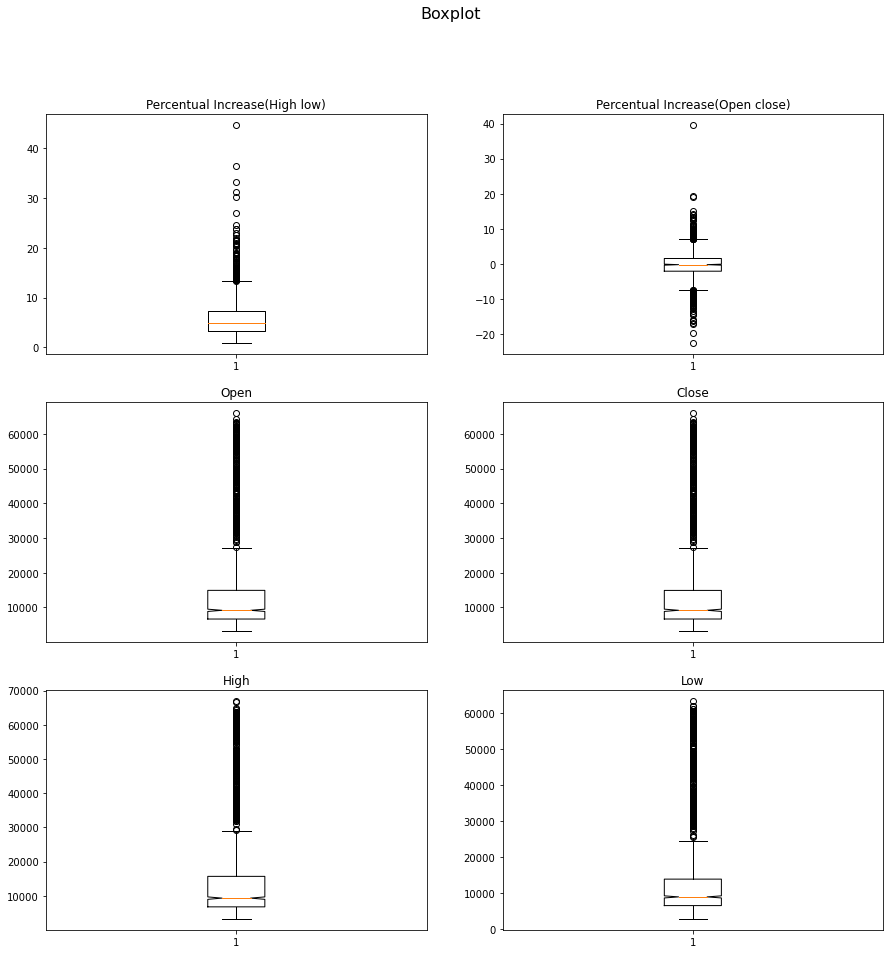

In [5]:
#declare a figure of 3 rows and 2 columns
fig, axs = plt.subplots(3, 2,figsize=(15,15))

# Read the boxplot from left to right
# first box plot
axs[0, 0].boxplot(df_binance["Percentual Increase(High low)"])
axs[0, 0].set_title('Percentual Increase(High low)')

# second boxplot
axs[0, 1].boxplot(df_binance["Percentual Increase(Open close)"], 1)
axs[0, 1].set_title('Percentual Increase(Open close)')

# third boxplot
axs[1, 0].boxplot(df_binance["Open"], 1)
axs[1, 0].set_title('Open')

# fourth boxplot
axs[1, 1].boxplot(df_binance["Close"], 1)
axs[1, 1].set_title('Close')

# fifth boxplot
axs[2, 0].boxplot(df_binance["High"], 1)
axs[2, 0].set_title('High')
# sixt boxplot
axs[2, 1].boxplot(df_binance["Low"], 1)
axs[2, 1].set_title('Low')

fig.suptitle("Boxplot", fontsize=16)
plt.show()

## Time series of the BTC values
Here we find some different timeseries, the first with two different regression lines. 
One regression line has degree 1 
Anohter regression line has degree 3 which fit better the distribution of the data 


Regression line grade 1 Slope : 25.864307660908526
Regression line grade 1 Intercept : -3857.8510380575494
Regression line grade 3 Slope : 3.737323014418927e-05
Regression line grade 3 Intercept : -0.03882569564042359


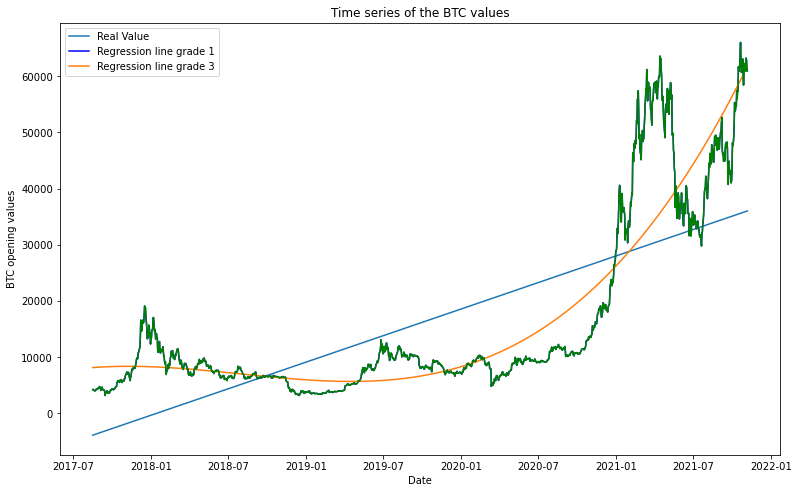

In [6]:
#declare the figure
fig = plt.figure(figsize=(10,6))
#Fit function : y = mx + c [linear regression ]
ax = fig.add_axes([0,0,1,1])

#linear regression
x = np.arange(df_binance["Open time"].size)
fit = np.polyfit(x, df_binance["Open"], deg=1)
print ("Regression line grade 1 Slope : " + str(fit[0]))
print ("Regression line grade 1 Intercept : " + str(fit[1]))
fit_function = np.poly1d(fit)
#Linear regression plot
ax.plot(df_binance["Open time"], fit_function(x))
ax.plot(df_binance["Open time"],df_binance["Open"], color="blue")

#linear regression grade 3
x = np.arange(df_binance["Open time"].size)
fit = np.polyfit(x, df_binance["Open"], deg=3)
print ("Regression line grade 3 Slope : " + str(fit[0]))
print ("Regression line grade 3 Intercept : " + str(fit[1]))
fit_function = np.poly1d(fit)
#Linear regression plot
ax.plot(df_binance["Open time"], fit_function(x))
#Real Values plot
ax.plot(df_binance["Open time"],df_binance["Open"], color="green")



# Set the x-axis values
dtFmt = mdates.DateFormatter('%Y-%m') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
#Set the legend
ax.legend(['Real Value','Regression line grade 1', 'Regression line grade 3'])
#Set x-y labels
plt.xlabel("Date")
plt.ylabel("BTC opening values")
ax.set_title("Time series of the BTC values")
plt.show()

## Time series of the BTC open and close values and its difference
Here we find some different timeseries, the open, close and the difference betweene the daily values.
The values are normalized to the max values of the variable in order to allow to see the lines

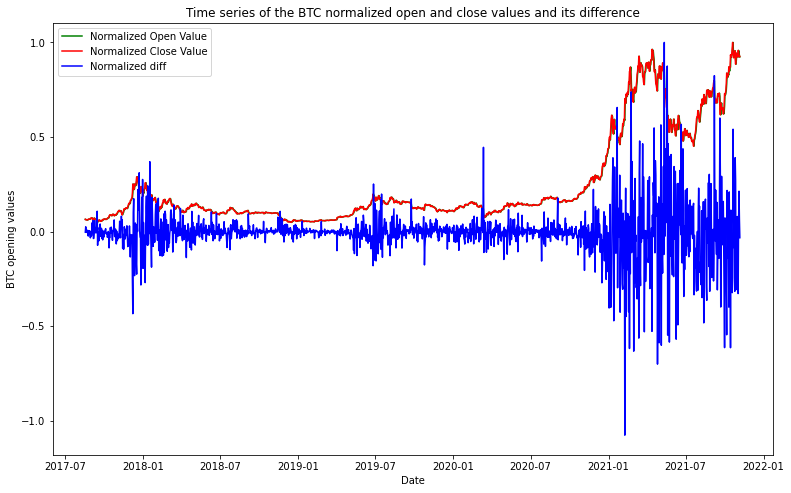

In [7]:
#declare the figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

# Plot the values
# We are going to normalize to visualize all the lines
ax.plot(df_binance["Open time"],df_binance["Open"]/max(df_binance["Open"]), color="green")
ax.plot(df_binance["Open time"],df_binance["Close"]/max(df_binance["Close"]), color="red")
ax.plot(df_binance["Open time"],df_binance["Open-Close"]/max(df_binance["Open-Close"]), color="blue")

# Set the axis values
dtFmt = mdates.DateFormatter('%Y-%m') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
ax.legend(['Normalized Open Value', 'Normalized Close Value',"Normalized diff" ])
plt.xlabel("Date")
plt.ylabel("BTC opening values")
ax.set_title("Time series of the BTC normalized open and close values and its difference")
plt.show()

## Time series of the BTC open and Number of trades
Here we find some different timeseries, the open and Number of trades.
The values are normalized to the max values of the variable in order to allow to see the lines

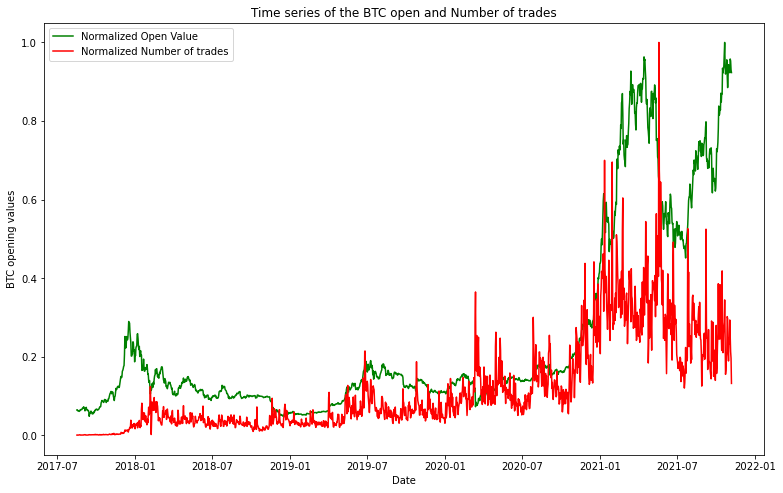

In [8]:
#declare the figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

# Plot the values
# We are going to normalize to visualize all the lines

ax.plot(df_binance["Open time"],df_binance["Open"]/max(df_binance["Open"]), color="green")
ax.plot(df_binance["Open time"],df_binance["Number of trades"]/max(df_binance["Number of trades"]), color="red")

#Set the lables
dtFmt = mdates.DateFormatter('%Y-%m') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
ax.legend(['Normalized Open Value', 'Normalized Number of trades'])
plt.xlabel("Date")
plt.ylabel("BTC opening values")
ax.set_title("Time series of the BTC open and Number of trades")
plt.show()

## Time series of the BTC Number of trades and Volume
Here we find some different timeseries, the Number of trades and Volume.
The values are normalized to the max values of the variable in order to allow to see the lines

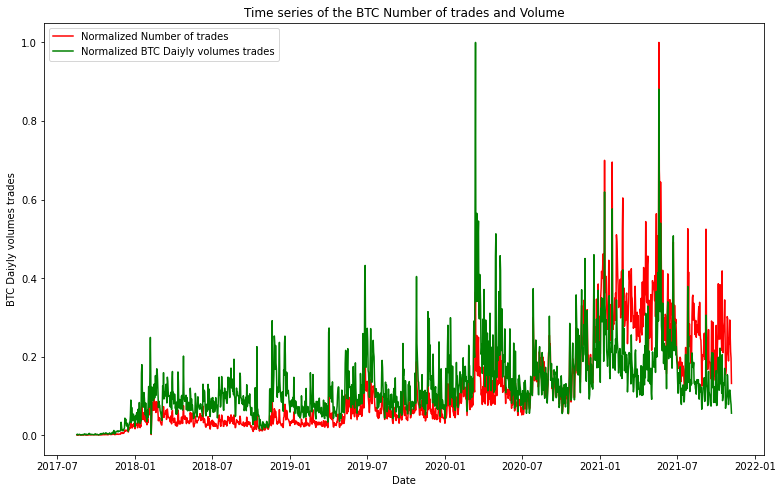

In [9]:
#declare the figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

#Plot normalized values
ax.plot(df_binance["Open time"],df_binance["Number of trades"]/max(df_binance["Number of trades"]), color="red")
ax.plot(df_binance["Open time"],df_binance["Volume"]/max(df_binance["Volume"]), color="green")

#Set the lables
dtFmt = mdates.DateFormatter('%Y-%m') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
ax.legend(["Normalized Number of trades","Normalized BTC Daiyly volumes trades"])
plt.xlabel("Date")
plt.ylabel("BTC Daiyly volumes trades")
ax.set_title("Time series of the BTC Number of trades and Volume")
plt.show()

# Daily percentage

Here we find the timeseries, of the percentage difference between the open and close, and High and low values


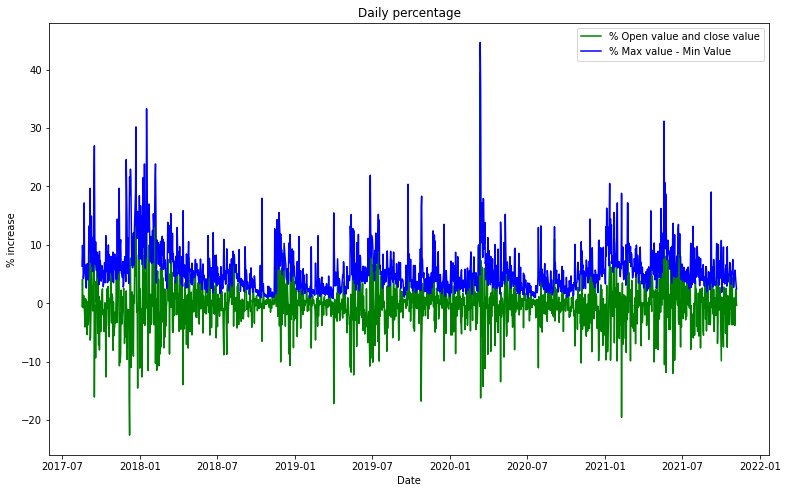

In [10]:
#declare the figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

#Plot normalized values
ax.plot(df_binance["Open time"],df_binance["Percentual Increase(Open close)"], color="green")
ax.plot(df_binance["Open time"],df_binance["Percentual Increase(High low)"], color="blue")

#Set the lables
dtFmt = mdates.DateFormatter('%Y-%m') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
ax.legend(['% Open value and close value', "% Max value - Min Value"])
plt.xlabel("Date")
plt.ylabel("% increase")
ax.set_title("Daily percentage")
plt.show()

# Correlation Matrix

In order to show the corellation between columns, show the heatmap with seaborn.



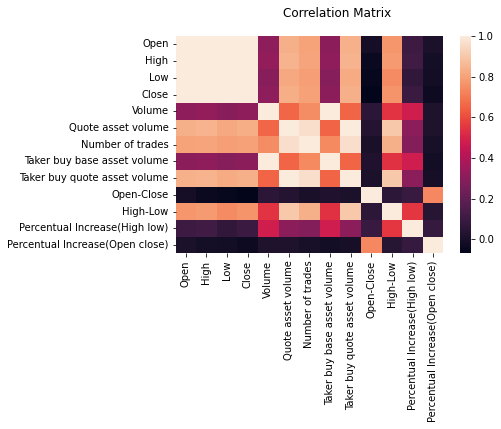

In [16]:
# calculate the correlation matrix
corr = df_binance.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.suptitle("Correlation Matrix")
plt.show()


# How much was it possible to earn?



In [12]:
def calculator(capital,dayI,dayF):
    #Find the values of first day
    df_i = df_binance[df_binance["Open time"]==dayI]
    #Find the values of last day
    df_f = df_binance[df_binance["Open time"]==dayF]
    #calculate the last value
    percentual_increase = ((df_f["Open"].iloc[-1]-df_i["Open"][0])/df_i["Open"][0])*100
    #print the findings
    print("Percentual increase: ", percentual_increase,"%")
    print("If you had invested ",capital," in ",dayI, " and disinvested in "
          , dayF," you would have earned ", ((percentual_increase*capital)/100)-capital)


In [13]:
text = ("# How much was it possible to earn?")
calculator(1000,"2017-08-17","2021-08-17")#1/df_binance["Open"][0]

Percentual increase:  977.1210940799913 %
If you had invested  1000  in  2017-08-17  and disinvested in  2021-08-17  you would have earned  8771.210940799914
